In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import math
import os
%matplotlib inline

In [683]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [684]:
# Clean
null_cols = df.isnull().sum()
null_cols

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [685]:
# Clean Publisher and Developer Columns. Remove Developer Column
df['Publisher'] = np.where(df['Publisher'].isna()==True, df['Developer'], df['Publisher'])
df.drop(['Developer'], axis=1, inplace=True)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [686]:
df = df.rename(columns={'Year_of_Release':'Year', 'Publisher':'Developer'})

In [687]:
df = df[df['Year'].isna()==False]
df['Year'] = df['Year'].astype(int)

df = df[df['Name'].isna()==False]

In [688]:
df.shape

(16448, 15)

In [689]:
df.head()

,Name,Platform,Year,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [690]:
null_cols = df.isnull().sum()
null_cols

Name               0
Platform           0
Year               0
Genre              0
Developer         29
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8465
Critic_Count    8465
User_Score      6608
User_Count      8985
Rating          6679
dtype: int64

In [691]:
df.loc[df['Name'] == 'Shrek / Shrek 2 2-in-1 Gameboy Advance Video', 'Publisher'] = "Activision"
df.loc[df['Name'] == "Bentley's Hackpack", 'Publisher'] = "Sony Computer Entertainment"
df = df[df['Developer'].isna()==False]

df.loc[df['User_Score'] == "tbd", 'User_Score'] = None
df['User_Score'] = df['User_Score'].astype(float)
df['User_Score'] = df['User_Score']*10

In [692]:
df.drop(['Publisher'], axis=1, inplace=True)

In [693]:
null_cols = df.isnull().sum()
null_cols

Name               0
Platform           0
Year               0
Genre              0
Developer          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8436
Critic_Count    8436
User_Score      8956
User_Count      8956
Rating          6650
dtype: int64

### Data set with No NaN values - only with games with full score/rating information

In [694]:
df_s = df.copy().dropna()

df_s.reset_index(inplace=True)
df_s = df_s.rename(columns={'index':'rank'})
df_s.head()

,rank,Name,Platform,Year,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,E
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,E
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,E
3,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,E
4,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,E


In [695]:
sns.set()

In [699]:
df1 = df_s.groupby(['Genre']).mean()
df1.head()

,rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Genre,,,,,,,,,,,
Action,6523.076687,2008.401227,0.362718,0.237902,0.046730,0.090466,0.738135,67.828834,30.204908,70.958282,202.201840
Adventure,8986.633065,2007.633065,0.156492,0.101048,0.035202,0.032460,0.325605,66.133065,24.947581,71.608871,114.770161
Fighting,6165.248677,2007.121693,0.360820,0.160053,0.073677,0.066508,0.661243,69.732804,28.873016,73.018519,66.544974
Misc,5626.265625,2007.934896,0.578255,0.313698,0.086510,0.105234,1.084010,67.460938,24.828125,68.497396,33.447917
Platform,6184.205955,2006.339950,0.480397,0.269380,0.106923,0.080720,0.937469,70.000000,26.784119,73.771712,114.590571


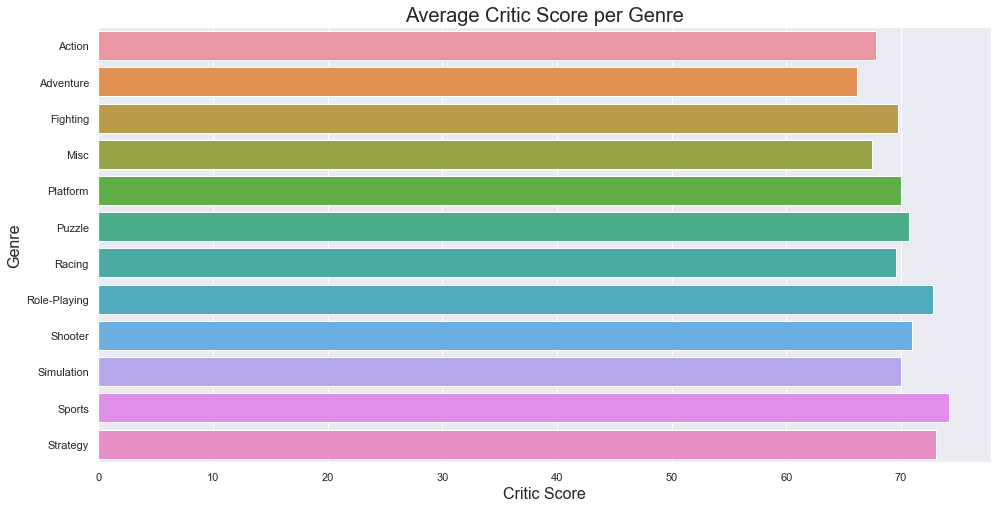

In [704]:


plt.figure(figsize=(16,8))
ax = sns.barplot(y = df1.index, x = df1['Critic_Score'], orient='h')

ax.set_xlabel(xlabel='Critic Score', fontsize=16)
ax.set_ylabel(ylabel="Genre", fontsize=16)
ax.set_title(label="Average Critic Score per Genre", fontsize=20)



plt.show()

In [717]:
df_pv = pd.pivot_table(df_s, values='Critic_Score',index='Year',columns=['Genre'],aggfunc=np.mean)[8:]
df_pv

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2000,64.266667,67.333333,61.888889,75.000000,73.000000,72.000000,71.928571,76.411765,68.900000,76.200000,83.384615,74.600000
2001,68.303030,71.571429,79.400000,67.900000,72.038462,83.000000,69.391304,73.636364,71.964286,77.250000,76.291667,78.250000
2002,69.410256,68.500000,67.500000,54.600000,67.031250,62.333333,68.666667,73.741935,71.192982,76.571429,76.930000,72.666667
2003,66.908163,68.500000,69.965517,66.700000,68.461538,75.000000,67.951613,75.838710,70.666667,78.700000,79.762500,74.555556
2004,67.873563,64.043478,68.096774,65.076923,71.710526,75.000000,70.146341,73.644444,70.246377,69.125000,77.816901,74.863636
2005,69.845588,63.300000,65.321429,67.037037,67.230769,67.333333,69.708333,70.102041,70.761905,73.240000,75.948052,71.529412
2006,64.903846,61.619048,71.096774,71.000000,65.718750,66.200000,68.811321,72.307692,68.611111,66.451613,70.783133,70.571429
2007,61.118110,72.500000,68.090909,61.590909,64.800000,69.041667,66.705882,68.865385,72.540541,68.710526,72.375000,70.685714
2008,66.044118,57.857143,69.384615,65.020000,65.735294,71.857143,65.700000,71.945205,68.546875,66.214286,67.493671,71.350000


In [ ]:
table = pivot_table(df, values='D', index=['A', 'B'],
...                     columns=['C'], aggfunc=np.sum)

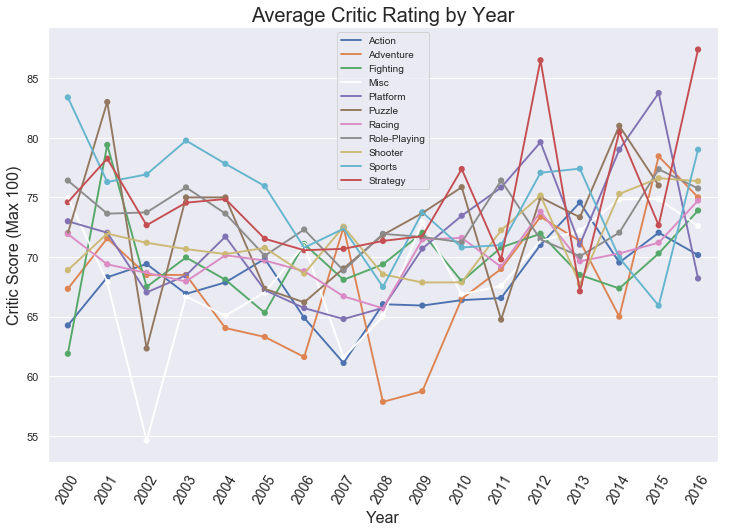

In [738]:
regions = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Sports','Strategy']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=df_pv.index, y=df_pv['Action'], color='C0', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Adventure'], color='C1', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Fighting'], color='C2', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Misc'], color='w', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Platform'], color='C4', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Puzzle'], color='C5', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Racing'], color='C6', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Role-Playing'], color='C7', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Shooter'], color='C8', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Sports'], color='C9', scale=0.7)
ax = sns.pointplot(x=df_pv.index, y=df_pv['Strategy'], color='C3', scale=0.7)

ax.set_xticklabels(labels=df_pv.index, fontsize=14, rotation=60)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Critic Score (Max 100)', fontsize=16)
ax.set_title(label='Average Critic Rating by Year', fontsize=20)
ax.legend(handles=ax.lines[::len(df_pv.index)+1], labels=regions, fontsize=10)
plt.show()

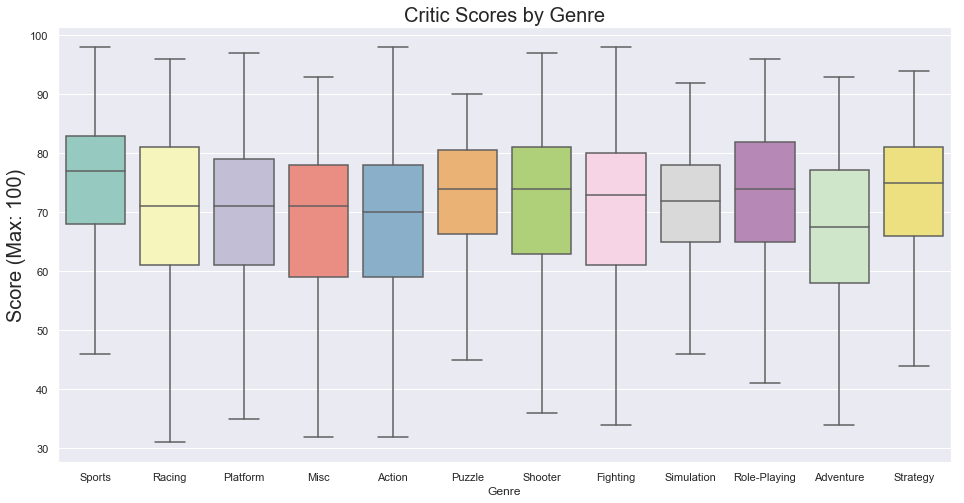

In [748]:


plt.figure(figsize=(16,8))
colors = sns.color_palette("GnBu_d")
ax = sns.boxplot(x=df_s['Genre'], y=df_s['Critic_Score'],data=df_s, palette='Set3', showfliers=False)
ax.set_ylabel(ylabel='Score (Max: 100)', fontsize=20)
ax.set_title(label='Critic Scores by Genre', fontsize=20)


plt.show()

In [745]:
df_s['Rating'].value_counts()

T       2378
E       2082
M       1433
E10+     930
RP         1
K-A        1
AO         1
Name: Rating, dtype: int64

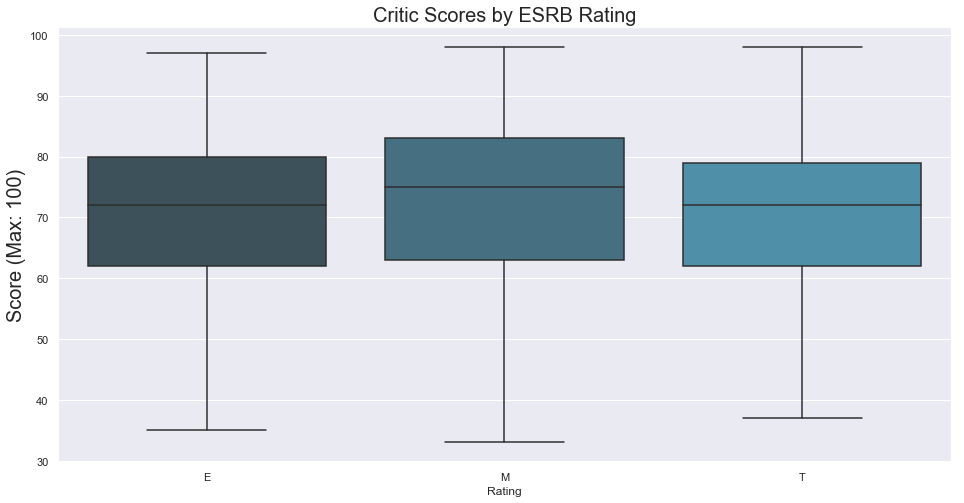

In [750]:
plt.figure(figsize=(16,8))
colors = sns.color_palette("GnBu_d")
ax = sns.boxplot(x=df_s['Rating'], y=df_s['Critic_Score'],data=df_s, palette=colors, showfliers=False)
ax.set_ylabel(ylabel='Score (Max: 100)', fontsize=20)
ax.set_title(label='Critic Scores by ESRB Rating', fontsize=20)
#ax.set_xticklabels(labels = df_s['Rating'], fontsize=16, rotation=50)

plt.show()